<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/main/cnn_with_grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
!pip install tensorflow

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape # this means 60000 images with 28*28 pixels (width AND height)

(60000, 28, 28)

In [8]:
single_image = x_train[0]

In [10]:
single_image.shape

(28, 28)

In [12]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

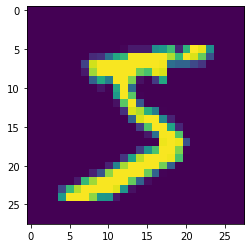

In [11]:
plt.imshow(single_image)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(60000,)

In [16]:
y_example = to_categorical(y_train)

In [17]:
y_example.shape

(60000, 10)

In [19]:
y_example[0] # this means this index belongs to index location 5~

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [23]:
y_cat_train = to_categorical(y_train,10)

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [27]:
x_train = x_train/255 # to get the values between 0 and 1

In [28]:
x_test = x_test/255

In [29]:
scaled_image = x_train[0]

In [31]:
scaled_image.max()

0.00392156862745098

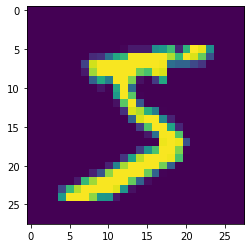

In [33]:
plt.imshow(scaled_image)

In [34]:
x_train.shape

(60000, 28, 28)

In [35]:
#no of images(batch_size), width, height and color channel (1 because gray) in rgb it should be 3
x_train = x_train.reshape(60000,28,28,1)

In [36]:
x_train.shape

(60000, 28, 28, 1)

In [37]:
x_test = x_test.reshape(10000,28,28,1)

In [38]:
x_test.shape

(10000, 28, 28, 1)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [40]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu')) #(28,28,1)(width,height,color channel)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #flatten here by 28*28 = 784 neurons

model.add(Dense(128,activation='relu'))


#outputlayer -->multiclass
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
earlystop = EarlyStopping(monitor='val_loss',patience=1)

In [45]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks=[earlystop])

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3154 - accuracy: 0.9059 - val_loss: 50.5795 - val_accuracy: 0.8838
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2568 - accuracy: 0.9238 - val_loss: 34.7038 - val_accuracy: 0.9234
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2109 - accuracy: 0.9373 - val_loss: 28.1745 - val_accuracy: 0.9397
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1778 - accuracy: 0.9470 - val_loss: 23.1536 - val_accuracy: 0.9514
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1545 - accuracy: 0.9540 - val_loss: 21.7701 - val_accuracy: 0.9541
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1369 - accuracy: 0.9587 - val_loss: 20.0554 - val_accuracy: 0.9599
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1229 - accuracy: 0.9633 - val_loss: 19

In [48]:
metrics = pd.DataFrame(model.history.history)

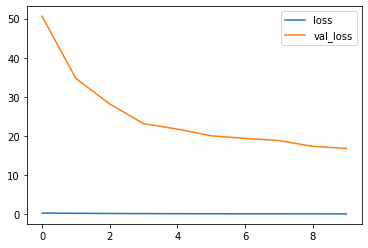

In [49]:
metrics[['loss','val_loss']].plot()

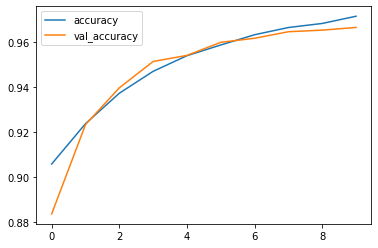

In [50]:
metrics[['accuracy','val_accuracy']].plot()

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
model.evaluate(x_test,y_cat_test,verbose=0)

[16.834857940673828, 0.9664999842643738]

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [55]:
y_cat_test.shape

(10000, 10)

In [57]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.99      0.93      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [59]:
print(confusion_matrix(y_test,predictions))

[[ 975    0    0    1    1    0    0    1    2    0]
 [   0 1120    5    0    0    1    2    1    6    0]
 [   6    0 1010    1    1    0    1    5    8    0]
 [   3    1   10  974    1    1    0    7   12    1]
 [   0    0    7    0  946    1    3    2    2   21]
 [  11    1    4   15    2  834    6    2   12    5]
 [  11    3    1    1    2    5  930    0    5    0]
 [   1    6    9    3    1    0    1  994    5    8]
 [   9    1    6   10    2    3    4    5  931    3]
 [   5    7    1    9   19    1    1    7    8  951]]


In [62]:
import seaborn as sns

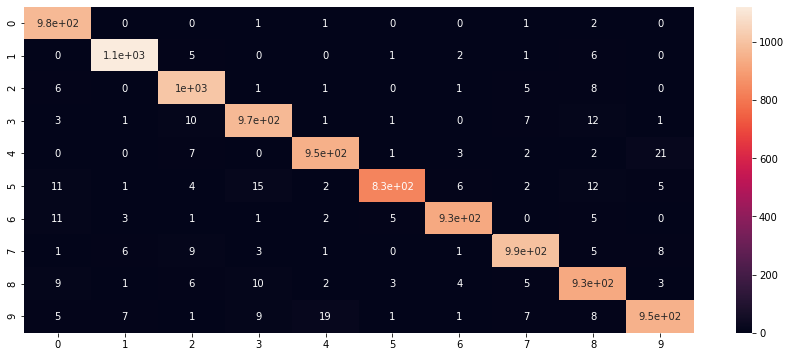

In [63]:
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [64]:
my_number = x_test[0]

In [66]:
my_number.shape

(28, 28, 1)

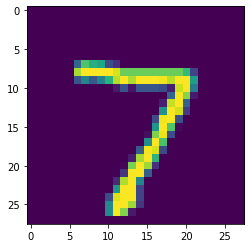

In [65]:
plt.imshow(my_number.reshape(28,28))

In [67]:

model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])